In [11]:
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from get_data import split_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set random seed
seed = 42

In [19]:
X = pd.read_csv('rhs_regression_dataset.csv')
y = X.pop('max ultimate height')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=seed)

In [20]:
# Normalise data
scaler = preprocessing.MinMaxScaler()
X_train_minmax= scaler.fit(X_train)
X_scaled = X_train_minmax.transform(X_train)

In [21]:
# Fit model
linear_regression_model = LinearRegression(normalize=True)
linear_regression_model.fit(X_train, y_train)

intercept = linear_regression_model.intercept_ # scalar (bias)
print(f'intercept: {intercept}')
coefficient = linear_regression_model.coef_ # array (weights)
print(f'coefficients: {coefficient}')

# Check cross validation score
lin_reg_scores = cross_val_score(linear_regression_model, X, y, cv=5)
print(f'cross validation scores: {lin_reg_scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (lin_reg_scores.mean(), lin_reg_scores.std()))

y_pred = linear_regression_model.predict(X)
print(f'predicted values: {y_pred}')

intercept: 0.3174313984604282
coefficients: [ 0.84891818 -0.39056198  0.6814394  -0.00662977  0.00492183]
cross validation scores: [0.94779636 0.9458801  0.93652429 0.92682276 0.88193903]
0.93 accuracy with a standard deviation of 0.02
predicted values: [ 2.74070312 14.50721297 14.30831997 ...  2.08831669  4.20514896
  1.23939851]


The mean squared error is 1.02


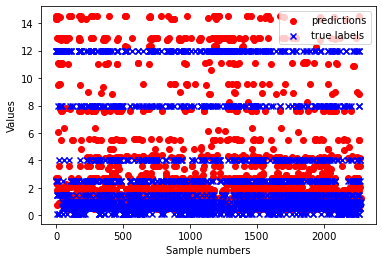

In [22]:
# Mean squared error score
def mse_score(y_pred, y):
    mse_score = round(mean_squared_error(y, y_pred, squared=True),2)
    print(f'The mean squared error is {mse_score}')
mse_score(y_pred, y)

# Plot predictions with true labels
def plot_predictions(y_pred, y):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

plot_predictions(y_pred, y)